In [1]:
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import re

In [2]:
nekretnina_polja = {
            'usluga': '',
            'tip': '',
            'cena' : '',
            'grad': '',
            'sira_lokacija':'',
            'uza_lokacija':'',
            'adresa': '',
            'povrsina': '',
            'plac':'',
            'broj_soba':'',
            'uknjizenost':'',
            'grejanje':'',
            'broj_etaza':'',
            'stanje':'',
            'godina_izgradnje':'',
            'spratnost':'',
            'lift':'',
            'infrastruktura':'',
            'parking':'',
            'garaza':'',
            'unutrasnje_prostorije':'',
            'namestenost':'',
            'opremljenost':'',
            'useljivo':'',
            'orijentacija_nekretnine':'',
            'tip_objekta':'',
            'tip_stana': '',
            'tip_kuce':'',
            'autobuske_linije':'',
            'sifra_oglasa':'',
            'opis': '',
            'link':''
}

In [3]:
nekretnine = pd.read_csv('./podaci/data_odbrana', lineterminator='\n', header='infer')
nekretnine.shape

(20223, 31)

In [4]:
def clean_data(row):
    try:
        row.cena = row.cena.replace('€','').replace('.','')
        row.povrsina = row.povrsina.replace('m²', '') 
    except BaseException as e:
        print(row)
    return row
nekretnine = nekretnine.apply(clean_data, axis='columns')

nekretnine[['cena']] = nekretnine[['cena']].astype(float)
nekretnine[['povrsina']] = nekretnine[['povrsina']].astype(float)

# Zadatak 3: Vizuelizacija podataka

## a) 10 najzastupljenijih delova Beograda koji imaju najveći broj nekretnina u ponudi (i u sekciji za prodaju, i u sekciji za iznajmljivanje, zbirno).

<AxesSubplot:xlabel='sira_lokacija'>

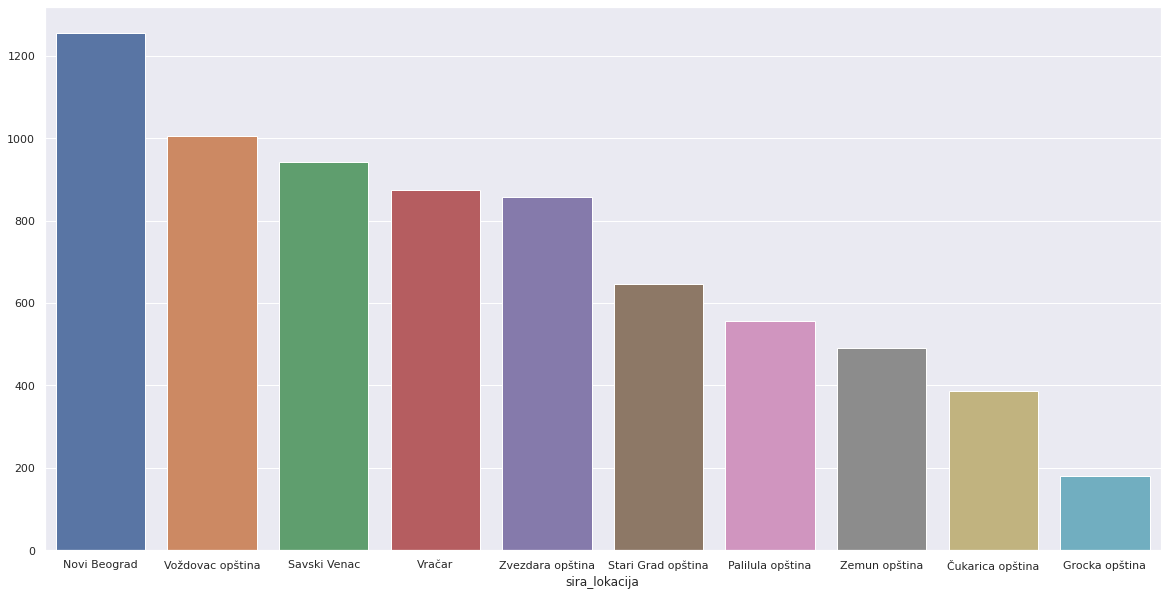

In [5]:
top10_oblast_beograd_sira = nekretnine[nekretnine.grad=='Beograd'].groupby('sira_lokacija').sira_lokacija.count().sort_values(ascending=False).head(10)

figure(figsize=(20, 10))
sns.barplot(x=top10_oblast_beograd_sira.index, y=top10_oblast_beograd_sira.values) 

<AxesSubplot:xlabel='uza_lokacija'>

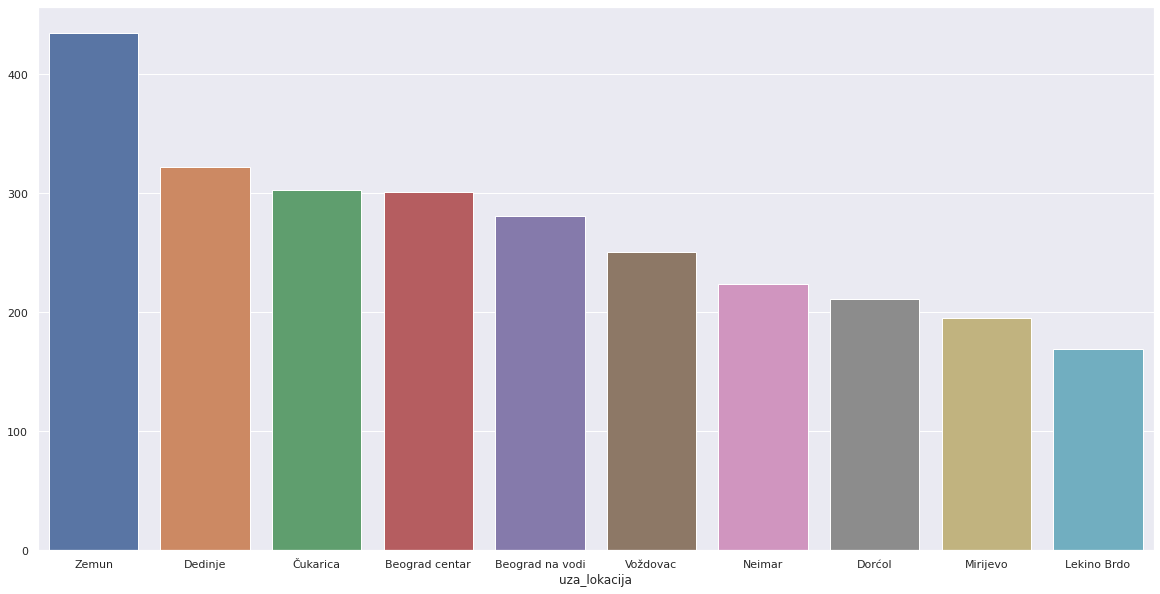

In [6]:
top10_oblast_beograd_uza = nekretnine[nekretnine.grad=='Beograd'].groupby('uza_lokacija').uza_lokacija.count().sort_values(ascending=False).head(10)

figure(figsize=(20, 10))
sns.barplot(x=top10_oblast_beograd_uza.index, y=top10_oblast_beograd_uza.values) 

<AxesSubplot:>

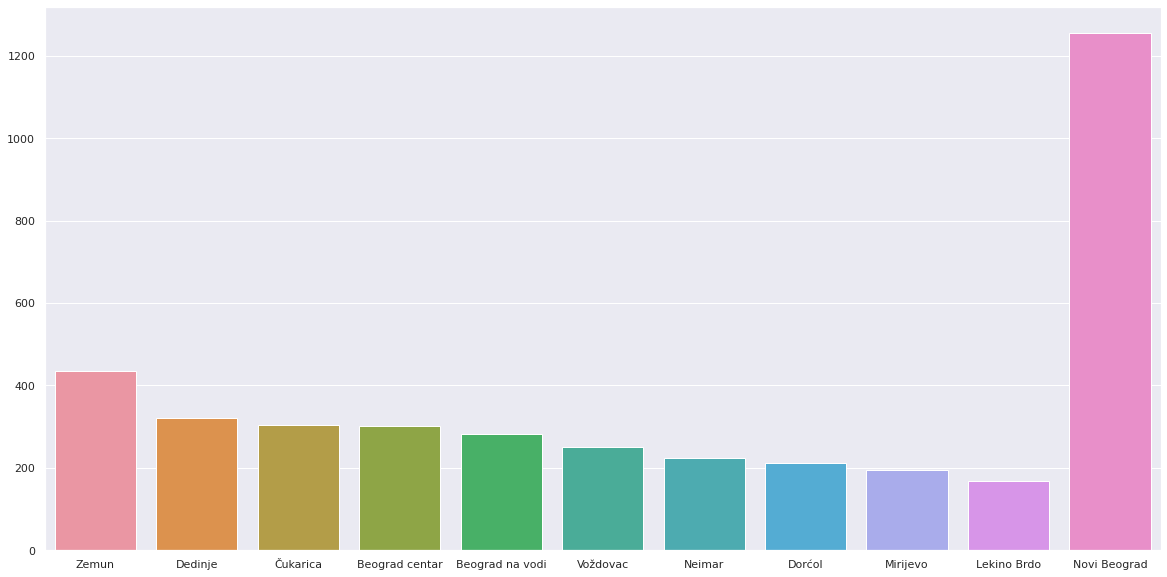

In [7]:
nbg = pd.Series([top10_oblast_beograd_sira['Novi Beograd']], ['Novi Beograd'])
top10_oblast_beograd_uza_sa_nbg = top10_oblast_beograd_uza.append(nbg)
figure(figsize=(20, 10))
sns.barplot(x=top10_oblast_beograd_uza_sa_nbg.index, y=top10_oblast_beograd_uza_sa_nbg.values) 

## b) Broj stanova za prodaju prema kvadraturi, u celoj Srbiji (do 35 kvadrata, 36-50, 51-65, 66-80, 81-95, 96-110, 111 kvadrata i više).

<AxesSubplot:xlabel='povrsina', ylabel='count'>

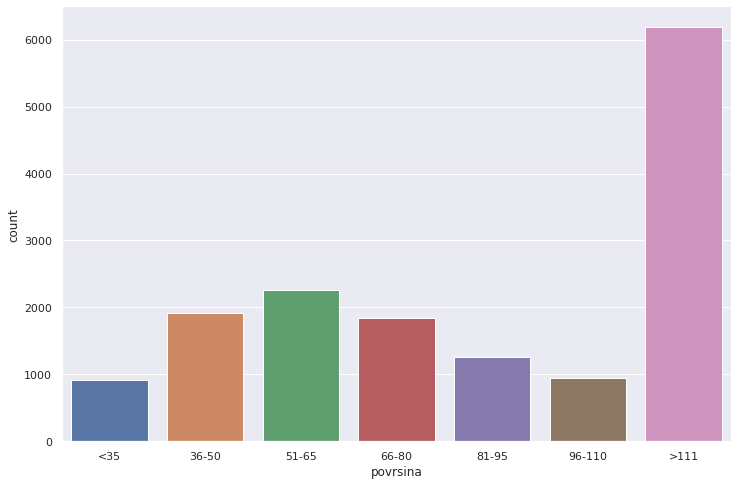

In [8]:
import numpy as np

bins = [-1, 35, 50, 65, 80, 95, 110, np.inf]
labels=['<35', '36-50', '51-65', '66-80', '81-95', '96-110', '>111']
prodaja = nekretnine[nekretnine.usluga=='prodaja']
prodaja=prodaja.groupby(pd.cut(prodaja['povrsina'], bins=bins, labels=labels)).size().reset_index(name='count')

figure(figsize=(12, 8))
sns.barplot(x=prodaja['povrsina'], y=prodaja['count'])

## c) Broj izgrađenih nekretnina po dekadama (1951-1960, 1961-1970, 1971-1980, 1981-1990, 1991-2000, 2001-2010, 2011-2020) 1 , a obuhvatiti i sekcije za prodaju i za iznajmljivanje.

In [9]:
def clean_data_godina_izgradnje(row):
    row.godina_izgradnje = re.sub('\D', '', str(row.godina_izgradnje))
    return row

nekretnine = nekretnine.apply(clean_data_godina_izgradnje, axis='columns')

In [10]:
nekretnine.godina_izgradnje.replace('', 0, inplace=True)
nekretnine.godina_izgradnje = nekretnine.godina_izgradnje.astype('int')
print(f'Informacija o izgradnji postoji za {nekretnine[nekretnine.godina_izgradnje != 0].godina_izgradnje.count()} nekretnina')

Informacija o izgradnji postoji za 4156 nekretnina


<AxesSubplot:xlabel='godina_izgradnje', ylabel='broj_nekretnina'>

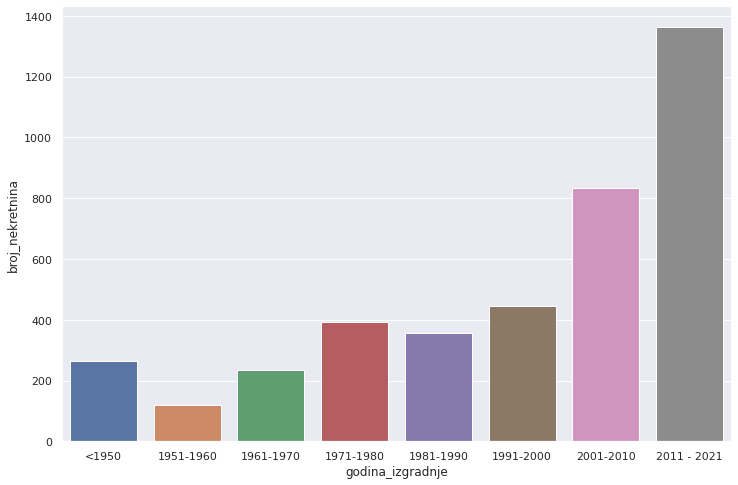

In [11]:
bins = [0,1950, 1960, 1970, 1980, 1990, 2000, 2010,2021]
labels=['<1950', '1951-1960', '1961-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011 - 2021']
df=nekretnine.groupby(pd.cut(nekretnine['godina_izgradnje'], bins=bins, labels=labels)).size().reset_index(name='broj_nekretnina')

figure(figsize=(12, 8))
sns.barplot(x=df['godina_izgradnje'], y=df['broj_nekretnina'])

## d) Broj (i procentualni odnos) nekretnina koje se prodaju i nekretnina koje se iznajmljuju, za prvih 5 gradova sa najvećim brojem nekretnina (za svaki grad posebno prikazati grafikon BROJ_ZA_PRODAJU : BROJ_ZA_IZNAJMLJIVANJE).

In [12]:
top_5_gradova = nekretnine.grad.value_counts().head(5).index.to_list()

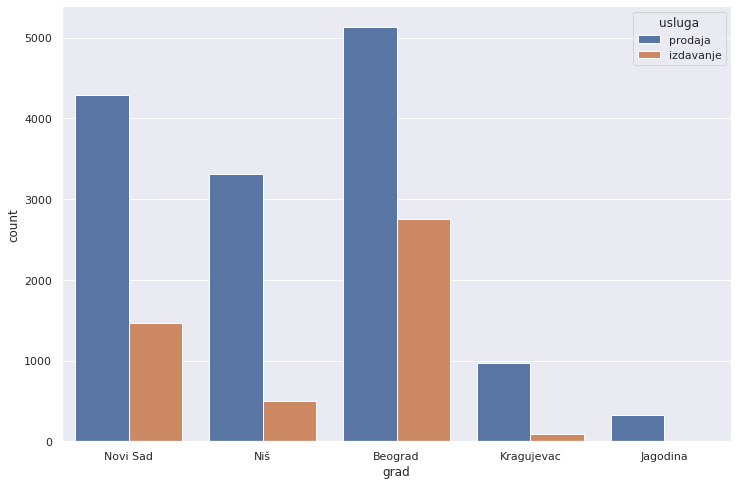

In [13]:
figure(figsize=(12, 8))
ax = sns.countplot(x="grad", hue="usluga", data=nekretnine[nekretnine.grad.isin(top_5_gradova)])

## e) Broj (i procentualni odnos) svih nekretnina za prodaju, koje po ceni pripadaju jednom od sledećih opsega: manje od 49 999 €, između 50 000 i 99 999 €, između 100 000 i 149 999 €, između 150 000 € i 199 999 €, 200 000 € ili više.

<AxesSubplot:xlabel='cena', ylabel='broj_nekretnina'>

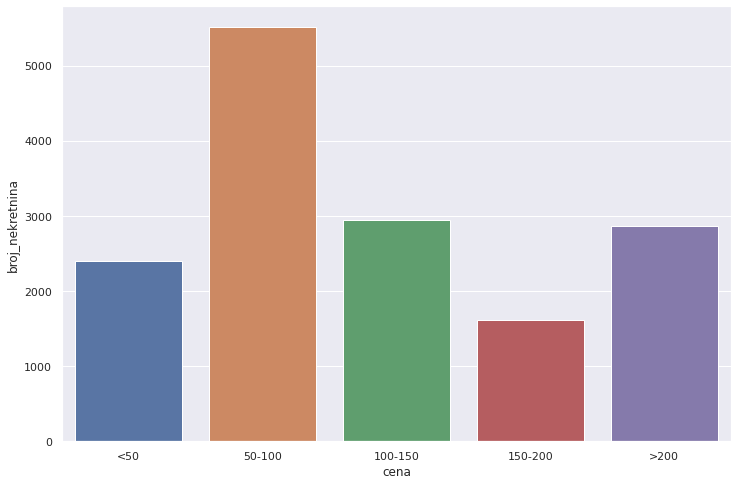

In [14]:
bins = [0, 50000, 100000, 150000, 200000, np.inf]
labels=['<50', '50-100', '100-150', '150-200', '>200']
prodaja = nekretnine[nekretnine.usluga=='prodaja']
prodaja=prodaja.groupby(pd.cut(prodaja['cena'], bins=bins, labels=labels)).size().reset_index(name='broj_nekretnina')

figure(figsize=(12, 8))
sns.barplot(x=prodaja['cena'], y=prodaja['broj_nekretnina'])

## f) Broj nekretnina za prodaju koje imaju parking, u odnosu na ukupan broj nekretnina za prodaju (samo za Beograd).

In [15]:
prodaja_beograd = nekretnine[(nekretnine.usluga=='prodaja') & (nekretnine.grad=='Beograd')]
ima_parking = prodaja_beograd[prodaja_beograd.parking.notna()]
print(f'{len(ima_parking)} nekretnina za prodaju ima parking od ukupno {prodaja_beograd.shape[0]} nekretnina u Beogradu')

1193 nekretnina za prodaju ima parking od ukupno 5129 nekretnina u Beogradu


In [16]:
parking = prodaja_beograd.parking.map(lambda parking: 'nema' if parking is np.nan else 'ima')

<AxesSubplot:>

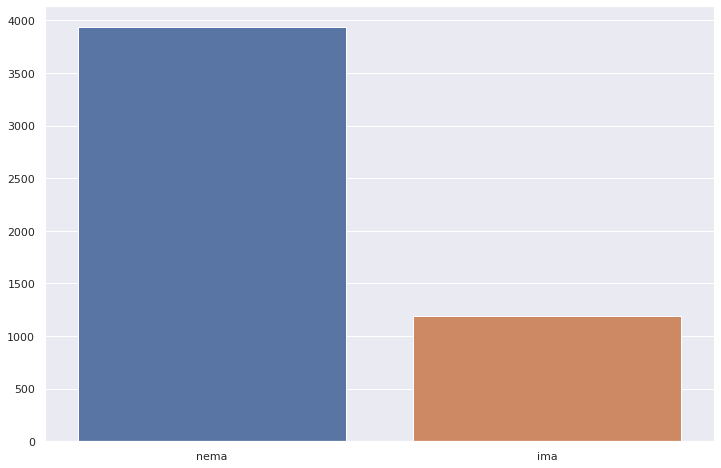

In [17]:
figure(figsize=(12, 8))
sns.barplot(x=parking.value_counts().index, y=parking.value_counts().values)